In [1]:
import numpy as np
import pandas as pd
import os, sys

import json

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/TransientTable"
save_dir = "./pics/random/"
os.makedirs(save_dir, exist_ok=True)
data_files = [
    file for file in os.listdir(data_dir) if ".csv" in file and "~lock" not in file
]

total_dataframe = pd.DataFrame()
for datafile in data_files:
    tmp_df = pd.read_csv(os.path.join(data_dir, datafile), sep=";")
    total_dataframe = pd.concat((total_dataframe, tmp_df))


total_entries = len(total_dataframe)

In [3]:
print(total_entries)

38333


In [4]:
def jsonify(string: str):
    if type(string) != str:
        return ""
    tmp_str = string.replace("'", '"')
    tmp_str = tmp_str.replace("None", "null")
    tmp_str = tmp_str.replace("True", "true")
    tmp_str = tmp_str.replace("False", "false")
    tmp_str = tmp_str.replace("inf", "Infinity")

    return tmp_str

## CHISQUARE STUFF

In [5]:
# print(total_dataframe.head())


pos_rowslist_dict = {
    "bns_maurice_1": [],
    "bns_maurice_2": [],
    "bns_maurice_3": [],
    "bns_maurice_4": [],
}
total_dataframe["ndet"] = np.zeros(len(total_dataframe))
rowslist = []
ndet_list = []
for k, row in total_dataframe.iterrows():
    dec_str = jsonify(row["rise_decline"])
    # print(tmp_str)
    dec_dict = json.loads(dec_str)
    # print(dec_dict["ndet"], row["kilonovaness"])

    ndet_list.append(dec_dict["ndet"])

    rowslist.append(dec_dict)

    # print(row["chisquares"])
    pos_str = jsonify(row["chisquares"])
    # print(row["chisquares"])
    # print(pos_str)
    if pos_str != "":
        pos_dict = json.loads(pos_str)
        # print(pos_dict)
        for key, value in pos_dict.items():
            value["ndet"] = dec_dict["ndet"]
            value["latest_det"] = dec_dict["jd_last"]
            value["first_det"] = dec_dict["jd_det"]
            value["kilonovaness"] = row["kilonovaness"]
            value["map_seed"] = row["map_seed"]
            value["map_dist"] = row["map_dist"]
            value["map_area"] = row["map_area"]
            if value["ndof"] > 0:
                value["red_chisqu"] = value["chisq"] / value["ndof"]
            else:
                value["red_chisqu"] = -999
            pos_rowslist_dict[key].append(value)
    # print(row["rise_decline"]["ndet"])

total_dataframe["ndet"] = ndet_list

print(rowslist[0])
print(len(rowslist))
pos_df_dict = {}
for key in pos_rowslist_dict:
    pos_df_dict[key] = pd.DataFrame(pos_rowslist_dict[key]).sort_values(by="ndet")

print(len(pos_df_dict[key]))

{'ndet': 5, 'frac_pos': 1.0, 'jd_det': 2459164.8586574, 'jd_last': 2459166.8463079, 't_lc': 1.9876504996791482, 't_predetect': 0.06024300027638674, 'mag_det': 19.610206604003906, 'band_det_id': 256, 'mag_last': 19.9067325592041, 'band_last_id': 256, 'mag_min': 19.584199905395508, 'jd_min': 2459165.762037, 'bool_pure': True, 'jd_peak_ztfg': 2459164.7606366, 'jd_peak_ztfi': 2459165.762037, 'rise_slope_ztfi': 3.8425515801301127, 'rise_slopesig_ztfi': 0.12231411839311314, 'fall_slope_ztfi': -24.40195607705821, 'fall_slopesig_ztfi': -1.5807511769547853, 'jd_peak_ztfr': 2459164.7984144, 'bool_rise': False, 'bool_fall': False, 'bool_peaked': False, 'bool_fastrise': None, 'bool_fastfall': None, 'bool_hasgaps': False, 'det_bands': 448, 'ztfg-ztfr_det': 0.497600555419922, 'ztfr-ztfi_det': 0.046773903591354055, 'last_bands': 256, 'success': True, 'eta_ztfi_flux': 0.7310077716160802, 'maximum_slope_ztfi_flux': 1554.5096097345536, 'period_0_ztfi_flux': 3.1057039057486686, 'period_s_to_n_0_ztfi_flux

In [6]:
total_dataframe[["kilonovaness", "ndet", "rise_decline"]]

kilonovaness  ndet                                       rise_decline
0               3     5  {'ndet': 5, 'frac_pos': 1.0, 'jd_det': 2459164...
1               1     2  {'ndet': 2, 'frac_pos': 1.0, 'jd_det': 2459164...
0               6     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458782...
1               4     4  {'ndet': 4, 'frac_pos': 1.0, 'jd_det': 2458782...
2               1     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458781...
..            ...   ...                                                ...
100             1     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458724...
101             1     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458722...
102             1     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2458722...
0               3     2  {'ndet': 2, 'frac_pos': 1.0, 'jd_det': 2459027...
0               6     1  {'ndet': 1, 'frac_pos': 1.0, 'jd_det': 2460016...

[38333 rows x 3 columns]

In [7]:
keys = list(pos_df_dict.keys())
key = keys[0]

fig = go.Figure()

max_red_chisq = 100
n_bins = 10
bins = np.linspace(0.8, max_red_chisq, n_bins)
print("bins:", bins)

os.makedirs(save_dir, exist_ok=True)
for key in keys[:]:

    total_number = len(pos_df_dict[key])
    print(f"% entries with fit:", key, ": ", total_number / total_entries)
    above_0_ndof = len(pos_df_dict[key][pos_df_dict[key]["ndof"] > 0])
    percentage_above_0_ndof = above_0_ndof / total_entries * 100
    print("ndof > 0:", above_0_ndof, "is", percentage_above_0_ndof, "%")

    tmp_data = pos_df_dict[key].copy()[
        np.logical_and(
            pos_df_dict[key]["chisq"] <= max_red_chisq, pos_df_dict[key]["chisq"] >= 0.8
        )
    ]

    tmp_hist = np.histogram(tmp_data["red_chisqu"], bins=bins)
    # print(tmp_hist)

    fig.add_trace(go.Bar(x=bins, y=tmp_hist[0] / total_entries * 100, name=key))
    # fig.add_trace(go.Histogram(x=tmp_data["chisq"], name=key))
fig.update_layout(
    {
        "xaxis_title": "reduced chisqu",
        "yaxis_title": "Portion of all candidates (%)",
        "title": "Reduced chisqu. distribution over random maps",
        "width": 600,
    }
)
fig.show()

filename = os.path.join(save_dir, "chisqu_dist.pdf")
fig.write_image(filename)

bins: [  0.8         11.82222222  22.84444444  33.86666667  44.88888889
  55.91111111  66.93333333  77.95555556  88.97777778 100.        ]
% entries with fit: bns_maurice_1 :  0.4690997313020113
ndof > 0: 7880 is 20.556700493047767 %
% entries with fit: bns_maurice_2 :  0.4690997313020113
ndof > 0: 7880 is 20.556700493047767 %
% entries with fit: bns_maurice_3 :  0.4690997313020113
ndof > 0: 7880 is 20.556700493047767 %
% entries with fit: bns_maurice_4 :  0.4690997313020113
ndof > 0: 7880 is 20.556700493047767 %


## NDET STUFF

In [8]:
ndet_hist = np.histogram(total_dataframe["ndet"], bins=np.max(total_dataframe["ndet"]))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=np.arange(np.max(total_dataframe["ndet"])), y=ndet_hist[0] / total_entries
    )
)
fig.update_layout(
    {
        "xaxis_title": "Number of detections",
        "yaxis_title": "Counts (relative)",
        "xaxis_range": (0, 25),
        "width": 500,
        "title": "Number of detections in random map events",
    }
)
fig.show()
filename = os.path.join(save_dir, "ndet.pdf")
fig.write_image(filename)

In [9]:
import plotly.express as px

In [10]:
fig = px.density_heatmap(
    x=total_dataframe["ndet"], y=total_dataframe["kilonovaness"], text_auto=True
)
fig.update_traces(
    marker=dict(size=2, line=dict(width=2, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)
fig.update_layout({"xaxis_title": "ndet", "yaxis_title": "kilonovaness"})

fig.show()
print(len(total_dataframe["ndet"]))

38333


### MEAN NDET IN RANDOM MAPS

In [11]:
maps = total_dataframe["map_seed"].unique()

max_ndet_list = []
mean_ndet_list = []
std_ndet_list = []
median_ndet_list = []
mean_kilonovaness_list = []
std_kilonovaness_list = []
max_kilonovaness_list = []
median_kilonovaness_list = []


for k, map in enumerate(maps):
    tmp_df = total_dataframe.copy()[total_dataframe["map_seed"] == map]

    mean_ndet_list.append(np.mean(tmp_df["ndet"]))
    max_ndet_list.append(np.max(tmp_df["ndet"]))
    median_ndet_list.append(np.median(tmp_df["ndet"]))
    std_ndet_list.append(np.std(tmp_df["ndet"]))

    mean_kilonovaness_list.append(np.mean(tmp_df["kilonovaness"]))
    std_kilonovaness_list.append(np.std(tmp_df["kilonovaness"]))
    max_kilonovaness_list.append(np.max(tmp_df["kilonovaness"]))
    median_kilonovaness_list.append(np.median(tmp_df["kilonovaness"]))

ndet_df = pd.DataFrame(
    {
        "map": maps,
        "max_ndet": max_ndet_list,
        "mean_ndet": mean_ndet_list,
        "std_ndet": std_ndet_list,
        "median_ndet": median_ndet_list,
        "mean_kilonovaness": mean_kilonovaness_list,
        "max_kilonovaness": max_kilonovaness_list,
        "median_kilonovaness": median_kilonovaness_list,
        "std_kilonovaness": std_kilonovaness_list,
    }
)

ndet_df.sort_values(by="mean_ndet", ascending=False)

map  max_ndet  mean_ndet  std_ndet  median_ndet  \
1870   601829917        50  50.000000  0.000000         50.0   
1038  1878653647        38  36.500000  1.118034         36.5   
1209  1997784644        29  23.500000  4.716991         24.5   
1034  1873941741        29  23.111111  4.067334         23.0   
1205  1995400186        23  23.000000  0.000000         23.0   
...          ...       ...        ...       ...          ...   
98    1084760108         1   1.000000  0.000000          1.0   
1670   437855928         1   1.000000  0.000000          1.0   
592   1498203297         1   1.000000  0.000000          1.0   
694   1579068338         1   1.000000  0.000000          1.0   
637    152808075         1   1.000000  0.000000          1.0   

      mean_kilonovaness  max_kilonovaness  median_kilonovaness  \
1870           9.000000                 9                  9.0   
1038           4.000000                 4                  4.0   
1209           5.166667                12                  2.0   
1034           5.000000                 9                  4.0   
1205          12.000000                12                 12.0   
...                 ...               ...                  ...   
98            13.000000                13                 13.0   
1670           3.000000                 3                  3.0   
592            5.000000                 5                  5.0   
694            1.000000                 1                  1.0   
637            8.750000                 9                  9.0   

      std_kilonovaness  
1870          0.000000  
1038          0.000000  
1209          4.487637  
1034          1.885618  
1205          0.000000  
...                ...  
98            0.000000  
1670          0.000000  
592           0.000000  
694           0.000000  
637           0.433013  

[2310 rows x 9 columns]

In [12]:
from ampel.contrib.hu.t3 import RandomMapGenerator
from ampel.log import AmpelLogger

In [13]:
rmg = RandomMapGenerator.RandomMapGenerator(logger=AmpelLogger())

map_ras = []
map_decs = []
map_times = []
map_dists = []

for seed in ndet_df["map"]:

    rmg.seed = seed
    rmg.generate_randoms()

    map_ras.append(rmg.longitude)
    map_decs.append(rmg.latitude)
    map_times.append(rmg.trigger_time)
    map_dists.append(rmg.distance)

ndet_df["map_ra"] = map_ras
ndet_df["map_dec"] = map_decs
ndet_df["map_time"] = map_times
ndet_df["map_dist"] = map_dists

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mplt

In [15]:
def plot_mwd(
    RA,
    Dec,
    org=0,
    title="Mollweide projection",
    projection="mollweide",
    c=None,
    cmap=plt.get_cmap("magma"),
    norm=mplt.colors.Normalize(),
):
    """RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    """
    x = np.remainder(RA + 360 - org, 360)  # shift RA values
    ind = x > 180
    x[ind] -= 360  # scale conversion to [-180, 180]
    x = -x  # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels + 360 + org, 360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection)
    sc = ax.scatter(
        np.radians(x),
        np.radians(Dec),
        c=c,
        cmap=cmap,
        marker="o",
        edgecolors="black",
        linewidths=1,
        norm=norm,
    )  # convert degrees to radians
    # fig.colorbar(sc)
    ax.set_xticklabels(tick_labels)  # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    return fig, ax, sc

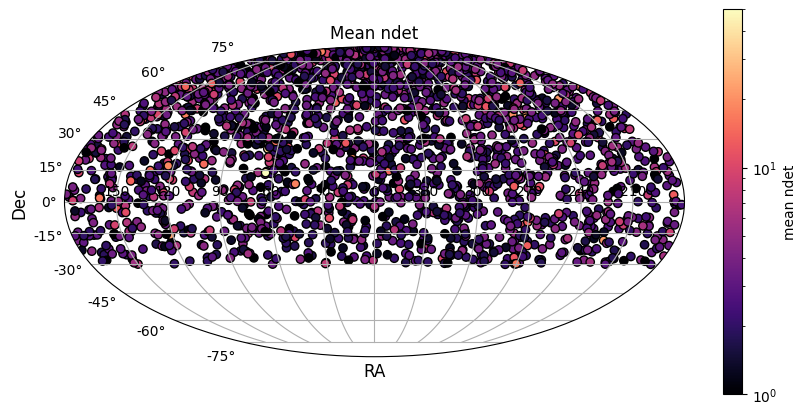

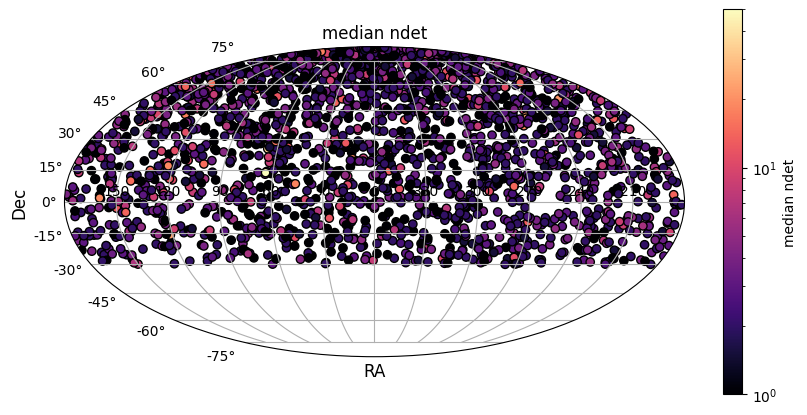

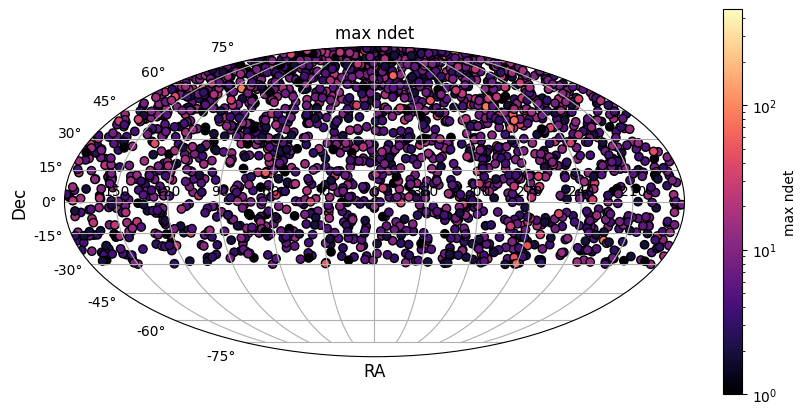

In [16]:
fig, ax, sc = plot_mwd(
    ndet_df["map_ra"],
    ndet_df["map_dec"],
    c=ndet_df["mean_ndet"],
    cmap=plt.get_cmap("magma"),
    norm=mplt.colors.LogNorm(),
)
ax.set_title("Mean ndet")
fig.colorbar(sc).set_label("mean ndet")

fig, ax, sc = plot_mwd(
    ndet_df["map_ra"],
    ndet_df["map_dec"],
    c=ndet_df["median_ndet"],
    cmap=plt.get_cmap("magma"),
    norm=mplt.colors.LogNorm(),
)
ax.set_title("median ndet")
fig.colorbar(sc).set_label("median ndet")

fig, ax, sc = plot_mwd(
    ndet_df["map_ra"],
    ndet_df["map_dec"],
    c=ndet_df["max_ndet"],
    cmap=plt.get_cmap("magma"),
    norm=mplt.colors.LogNorm(),
)
ax.set_title("max ndet")
fig.colorbar(sc).set_label("max ndet")

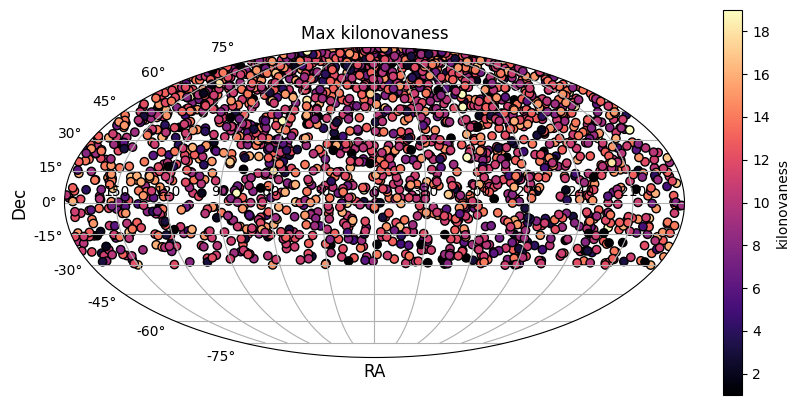

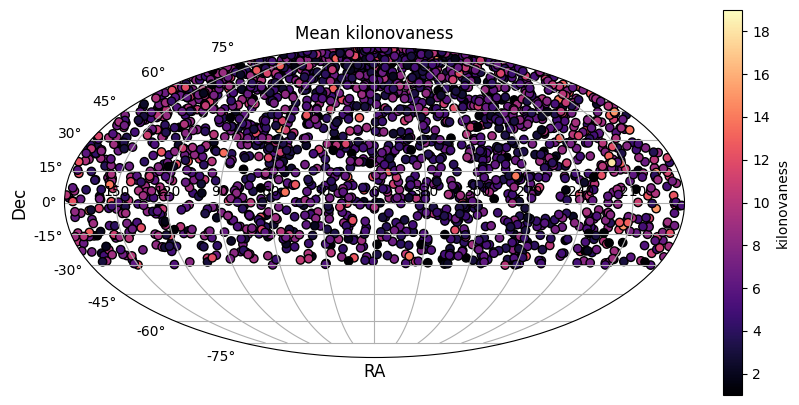

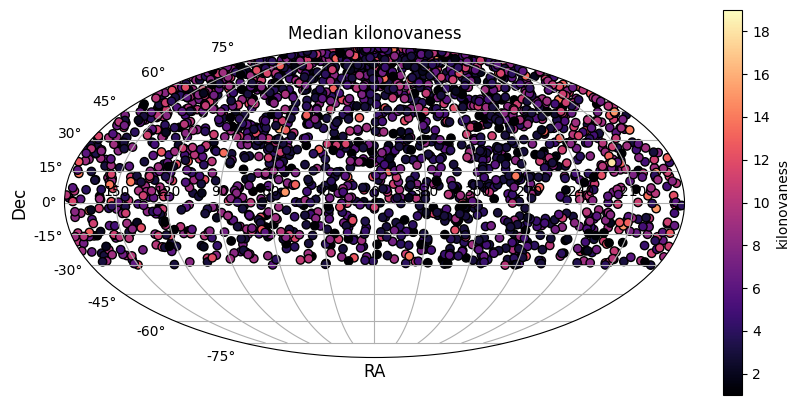

In [17]:
fig, ax, sc = plot_mwd(
    ndet_df["map_ra"], ndet_df["map_dec"], c=ndet_df["max_kilonovaness"]
)
ax.set_title("Max kilonovaness")
fig.colorbar(sc).set_label("kilonovaness")

fig, ax, sc = plot_mwd(
    ndet_df["map_ra"], ndet_df["map_dec"], c=ndet_df["mean_kilonovaness"]
)
ax.set_title("Mean kilonovaness")
fig.colorbar(sc).set_label("kilonovaness")

fig, ax, sc = plot_mwd(
    ndet_df["map_ra"], ndet_df["map_dec"], c=ndet_df["median_kilonovaness"]
)
ax.set_title("Median kilonovaness")
fig.colorbar(sc).set_label("kilonovaness")

In [18]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=ndet_df["mean_kilonovaness"], histnorm="probability"))
fig.update_layout(width=700, xaxis_title="Kilonovaness")
fig.show()
print(len(ndet_df))

2310


In [19]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        y=ndet_df["mean_kilonovaness"],
        x=ndet_df["mean_ndet"],
        mode="markers",
        name="mean kilonovaness",
    )
)
fig.add_trace(
    go.Scatter(
        y=ndet_df["max_kilonovaness"],
        x=ndet_df["mean_ndet"],
        mode="markers",
        name="max kilonovaness",
        opacity=0.4,
    )
)

In [20]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        y=ndet_df["mean_kilonovaness"],
        x=ndet_df["median_ndet"],
        mode="markers",
        name="mean kilonovaness",
    )
)
fig.add_trace(
    go.Scatter(
        y=ndet_df["max_kilonovaness"],
        x=ndet_df["median_ndet"],
        mode="markers",
        name="max kilonovaness",
        opacity=0.4,
    )
)

## BINNED ndet and dist

In [21]:
from scipy.optimize import minimize
from scipy.special import factorial
from scipy.optimize import curve_fit
from scipy import stats

In [22]:
def gaus(params, data):
    loc = params[0]
    scale = params[1]
    return stats.norm.pdf(data, loc=loc, scale=scale)


def gaus_curve(data, loc, scale):
    return stats.norm.pdf(data, loc=loc, scale=scale)

def gaus_cdf(xval, loc, scale):
    return stats.norm.cdf(xval, loc=loc, scale=scale)


def neg_log_like(params, data):
    loc = params[0]
    scale = params[1]
    return -stats.norm.logpdf(data, loc=loc, scale=scale).sum()

In [23]:
ndet_bins_mins = [0, 4, 10, 0]
ndet_bins_maxs = [4, 10, np.inf, np.inf]
dist_bins_mins = [0, 400, 800, 1200, 1600, 0]
dist_bins_maxs = [400, 800, 1200, 1600, np.inf, np.inf]

pattern_shape_sequence = [".", "x", "/", "\\"]
colors = ["red", "green", "blue", "orange", "grey", "purple"]

In [40]:
binned_gaus_dict = {max_ndet : {max_dist : {} for max_dist in dist_bins_maxs} for max_ndet in ndet_bins_maxs}

binned_gaus_dict

{4: {400: {}, 800: {}, 1200: {}, 1600: {}, inf: {}},
 10: {400: {}, 800: {}, 1200: {}, 1600: {}, inf: {}},
 inf: {400: {}, 800: {}, 1200: {}, 1600: {}, inf: {}}}

In [41]:
binned_gaus_dict

{4: {400: {}, 800: {}, 1200: {}, 1600: {}, inf: {}},
 10: {400: {}, 800: {}, 1200: {}, 1600: {}, inf: {}},
 inf: {400: {}, 800: {}, 1200: {}, 1600: {}, inf: {}}}

In [26]:
fig = make_subplots(
    cols=len(ndet_bins_maxs),
    rows=len(dist_bins_maxs),
    vertical_spacing=0.1,
    horizontal_spacing=0.1,
)

for col, ndet_max in enumerate(ndet_bins_maxs[:]):
    pattern = pattern_shape_sequence[col]
    ndet_min = ndet_bins_mins[col]
    ndet_mask = np.logical_and(
        ndet_min <= ndet_df["mean_ndet"], ndet_df["mean_ndet"] <= ndet_max
    )

    for row, dist_max in enumerate(dist_bins_maxs[:]):
        color = colors[row]

        dist_min = dist_bins_mins[row]
        dist_mask = np.logical_and(
            dist_min <= ndet_df["map_dist"], ndet_df["map_dist"] <= dist_max
        )

        binned_df = ndet_df[np.logical_and(ndet_mask, dist_mask)].copy()
        # fig.add_trace(go.Scatter(y=binned_df["mean_kilonovaness"], x=binned_df["median_ndet"], mode="markers"),
        #              row=row+1, col=col+1)

        kn_range = np.arange(0, 22)
        hist, bins = np.histogram(binned_df["mean_kilonovaness"], bins=kn_range)
        hist_rel = hist / sum(hist)
        # hist_std, bins_std = np.histogram(ndet_df["std_kilonovaness"], bins=bins)

        # print(len(hist_rel), len(bins))

        popt, pcov, info, msg, ier = curve_fit(
            gaus_curve, bins[:-1], hist_rel, p0=(1, 1), full_output=True
        )

        binned_gaus_dict[ndet_max][dist_max] = {"loc": popt[0], "scale": popt[1]}

        kn_fit_curve = gaus_curve(kn_range, *popt)

        fig.add_trace(
            go.Histogram(
                x=binned_df["mean_kilonovaness"],
                marker_pattern={"bgcolor": color, "shape": pattern},
                histnorm="probability",
                xbins={"start": 0, "end": 22, "size": 1},
            ),
            row=row + 1,
            col=col + 1,
        )

        fig.add_trace(
            go.Scatter(
                y=kn_fit_curve,
                x=kn_range,
                name="Gauss fit <br>(Least Squares)",
                line={"color": "crimson", "width": 4},
            ),
            row=row + 1,
            col=col + 1,
        )

        subplot_title = f"[{dist_min}, {dist_max}] Mpc; [{ndet_min}, {ndet_max}] ndet, <br> counts={len(binned_df)}"
        fig.add_annotation(
            xref="x domain",
            yref="y domain",
            showarrow=False,
            # The arrow head will be 25% along the x axis, starting from the left
            x=0,
            # The arrow head will be 40% along the y axis, starting from the bottom
            y=1.5,
            text=subplot_title,
            # arrowhead=2,
            row=row + 1,
            col=col + 1,
        )

fig.update_layout(
    height=1300,
    width=1000,
    title_text="Mean Kilonovaness, binned in GW map distance and ndet",
    showlegend=False,
    xaxis_title="kilonovaness",
)
fig.write_image("./pics/random/mean_kilonovaness_binned.pdf")
fig.show()

In [27]:
import json

In [28]:
binned_gaus_dict

{4: {400: [4.963321510293838, 3.1259229684334358],
  800: [5.343196570436615, 2.864636860954303],
  1200: [5.067631579059484, 2.869532773800559],
  1600: [4.196554565776684, 2.0076349562015787],
  inf: [4.580273656429091, 2.4654546799646484]},
 10: {400: [7.754798606201491, 3.2621625644497305],
  800: [8.114674932637955, 3.4398874701985385],
  1200: [7.577395733342081, 2.489112868545978],
  1600: [6.028921585365271, 1.967200390476158],
  inf: [6.738640290319282, 2.8455552891372853]},
 inf: {400: [5.673682940046467, 3.448678096869491],
  800: [5.9788849183544075, 3.2802027487519454],
  1200: [5.690456190178732, 3.089703391826756],
  1600: [4.690496631918793, 2.2586220934679857],
  inf: [5.1052446943068155, 2.753062659158644]}}

In [29]:
dumps = json.dumps(binned_gaus_dict, indent=2)
data_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/kilonovaness"
filename = os.path.join(data_dir, "binned_gaus_params.json")
with open(filename, "w") as file:
    file.write(dumps)
    file.close()

In [30]:
ndet_df.sort_values(by="mean_kilonovaness", ascending=False).head()

map  max_ndet  mean_ndet  std_ndet  median_ndet  \
2052   756404665         6        6.0       0.0          6.0   
517   1443058235         4        4.0       0.0          4.0   
277   1229307996         8        8.0       0.0          8.0   
1404   236839909         2        2.0       0.0          2.0   
806   1674432456         5        5.0       0.0          5.0   

      mean_kilonovaness  max_kilonovaness  median_kilonovaness  \
2052               18.0                18                 18.0   
517                16.0                16                 16.0   
277                15.0                15                 15.0   
1404               15.0                15                 15.0   
806                15.0                15                 15.0   

      std_kilonovaness      map_ra    map_dec      map_time    map_dist  
2052               0.0  217.396421  18.877369  1.244715e+09  140.921362  
517                0.0   62.813276  35.577639  1.341644e+09  820.054921  
277                0.0  193.245065  14.167283  1.287900e+09  545.286067  
1404               0.0  165.935784  -3.816380  1.369586e+09  860.288440  
806                0.0  249.099937  79.795883  1.300490e+09  371.969299

In [31]:
def get_keys(map_dist=np.inf, ndet=np.inf):
    ndet_key = np.inf
    map_key = np.inf
    if ndet:
        for key in binned_gaus_dict.keys():
            #print(ndet <= key)
            if ndet <= key:
                ndet_key = key
                break

    if map_dist:
        for key in binned_gaus_dict[ndet_key].keys():
            if map_dist <= key:
                map_key = key
                break
    
    return map_key, ndet_key

def get_kn_stats(map_dist=np.inf, ndet=np.inf):
    global binned_gaus_dict
    map_key, ndet_key = get_keys(map_dist=map_dist, ndet=ndet)

    #print(ndet_key, map_key)
    return binned_gaus_dict[ndet_key][map_key]

def get_kn_cumprob(kilonovaness, map_dist=np.inf, ndet=np.inf):
    gaus_stats = get_kn_stats(map_dist=map_dist, ndet=ndet)

    return gaus_cdf(kilonovaness, loc=gaus_stats[0], scale=gaus_stats[1])

In [32]:
def get_kn_densitiy_stats(kilonovaness, map_area, map_dist=np.inf):
    map_key, _ = get_keys(map_dist=map_dist, ndet=np.inf)

    data_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/kilonovaness"
    file_base = os.path.join(data_dir, "densities")

    density_files = os.listdir(file_base)
    file = [dfile for dfile in density_files if "-"+str(map_key) in dfile][0]

    dist_range = file[:file.find("_")]

    tmp_df = pd.read_csv(os.path.join(file_base, file), sep=";")
    tmp_df["kilonovaness"] = tmp_df["kilonovaness"].astype(int)
    tmp_df.index = tmp_df["kilonovaness"]
    
    exp_kn = map_area/1000 * tmp_df.iloc[kilonovaness]['rate-1000']
    exp_kn_pls = map_area/1000 * tmp_df.iloc[kilonovaness]['plus']
    exp_kn_min = exp_kn - map_area/1000 * tmp_df.iloc[kilonovaness]['minus']
    statement = f"For map of area = {map_area} squ.deg. at {dist_range} Mpc, expect {exp_kn:.1f} (+{exp_kn_pls:.1f} -{exp_kn_min:.1f}) candidates with kn = {kilonovaness}."
    print(statement)
    return tmp_df.loc[kilonovaness]

def get_kn_total_stats(kilonovaness, map_area, map_dist=np.inf, ndet=np.inf):
    gaus_stats = (1-get_kn_cumprob(kilonovaness, map_dist=map_dist, ndet=ndet)) * 100
    print(f"Map at this distance with this ndet, {gaus_stats:.5f}% of events have kn >= {kilonovaness}")

    res = get_kn_densitiy_stats(kilonovaness, map_area, map_dist=map_dist)

In [33]:
get_kn_total_stats(13, 12000, map_dist=502, ndet=2)

Map at this distance with this ndet, 0.37603% of events have kn >= 13
For map of area = 12000 squ.deg. at 400-800 Mpc, expect 0.8 (+2.8 -0.8) candidates with kn = 13.


In [34]:
get_kn_densitiy_stats(10, 200, map_dist=200)

For map of area = 200 squ.deg. at 0-400 Mpc, expect 0.0 (+0.1 -0.0) candidates with kn = 10.


Unnamed: 0        0.00000
kilonovaness     10.00000
rate-1000         0.12671
std-1000          0.27340
entries         215.00000
kn-count        130.00000
minus             0.00000
plus              0.40011
Name: 10, dtype: float64

In [35]:
def gamma(params, data):
    loc = params[0]
    scale = params[1]
    a = params[2]
    return stats.gamma.pdf(data, a, loc=loc)


def gamma_log(params, data):
    loc = params[0]
    scale = params[1]
    a = params[2]
    return -stats.gamma.logpdf(data, a, scale=scale).sum()

In [36]:
kn_range = np.arange(22, step=0.1)
hist, bins = np.histogram(ndet_df["mean_kilonovaness"], bins=kn_range)
hist_std, bins_std = np.histogram(ndet_df["std_kilonovaness"], bins=bins)

hist_rel = hist / sum(hist)

data = ndet_df["mean_kilonovaness"]
result = minimize(neg_log_like, x0=np.ones(2), args=(data,), method="Nelder-Mead")

result_gamma = minimize(gamma_log, x0=(0, 1, 7.5), args=(data,), method="Nelder-Mead")


kn_fit = gaus(result.x, kn_range)
# kn_fit_gamma = gamma((0, 0, 7.5), kn_range)
kn_fit_gamma = gamma(result_gamma.x, kn_range)

print(result_gamma)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 5598.895332252832
             x: [-6.396e-04  1.467e+00  4.118e+00]
           nit: 67
          nfev: 123
 final_simplex: (array([[-6.396e-04,  1.467e+00,  4.118e+00],
                       [-6.395e-04,  1.467e+00,  4.118e+00],
                       [-6.398e-04,  1.467e+00,  4.118e+00],
                       [-6.399e-04,  1.467e+00,  4.118e+00]]), array([ 5.599e+03,  5.599e+03,  5.599e+03,  5.599e+03]))


In [37]:
hist, bins = np.histogram(ndet_df["mean_kilonovaness"], bins=np.arange(20))
print(hist, bins)
hist_rel = hist / sum(hist)
# hist_std, bins_std = np.histogram(ndet_df["std_kilonovaness"], bins=bins)

print(len(hist_rel), len(bins))

popt, pcov, info, msg, ier = curve_fit(
    gaus_curve, bins[:-1], hist_rel, p0=(1, 1), full_output=True
)

kn_fit_curve = gaus_curve(kn_range, *popt)

print(popt, pcov, info)

[  0  96 162 291 331 339 303 224 174 150  94  61  46  23   8   6   1   0
   1] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
19 20
[5.10524427 2.75306224] [[ 0.01973121 -0.00049009]
 [-0.00049009  0.01351591]] {'fvec': array([ 2.59644001e-02,  6.11289720e-03,  6.57743352e-03, -1.78016426e-02,
       -9.60082225e-03, -1.95053339e-03,  6.28514894e-03,  1.73808516e-02,
        8.04718609e-03, -1.16628129e-02, -1.08606024e-02, -1.17661162e-02,
       -1.36162182e-02, -7.58298488e-03, -2.67902748e-03, -2.37036542e-03,
       -3.75292708e-04,  1.28104617e-05, -4.30403832e-04]), 'nfev': 37, 'fjac': array([[-9.83931814e-02,  2.15329202e-01,  7.70852077e-02,
        -1.65824648e-01, -4.13996513e-01, -5.33784729e-01,
        -4.53833348e-01, -2.22181213e-01,  3.25045673e-02,
         1.96938637e-01,  2.37995667e-01,  1.93740239e-01,
         1.22555406e-01,  6.32948258e-02,  2.73218396e-02,
         9.98779444e-03,  3.11749666e-03,  8.35415503e-04,
         1.92948667e-04],
     

In [38]:
fig = go.Figure()


save_file = "./pics/mean_kilonovaness_unbinned_fit.pdf"


fig.add_trace(
    go.Bar(
        y=hist_rel,
        x=bins,
        name="Data",
        marker_color="lightblue",
        marker_line={"color": "black", "width": 4},
    )
)
# fig.add_trace(go.Scatter(y=kn_fit, x=kn_range, name="gaus loglike"))
# fig.add_trace(go.Scatter(y=kn_fit_gamma, x=kn_range, name="gamma"))
fig.add_trace(
    go.Scatter(
        y=kn_fit_curve,
        x=kn_range,
        name="Gauss fit <br>(Least Squares)",
        line={"color": "crimson", "width": 4},
    )
)
# fig.add_trace(go.Bar(y=hist, x=bins, name="Data 2"))
fig.add_vline(
    x=16,
    name="AT2017gfo 3 days post-merger",
    annotation={
        "text": "AT2017gfo 3 days   <br>post-merger",
        "align": "left",
        "font_size": 19,
    },
    annotation_position="left",
    line_color="forestgreen",
    line_dash="dot",
    line_width=5,
)
fig.update_layout(
    {
        "xaxis_title": "Mean kilonovaness",
        "width": 800,
        "title": f"Discretized mean kilonovaness in <br>{len(ndet_df) } randomly generated maps",
        "legend_visible": True,
    }
)
fig.update_layout(plot_bgcolor="white", font_size=17)
fig.update_xaxes(
    ticks="outside",
    showline=True,
    linecolor="black",
    gridcolor="white",
    range=(0, 18),
    tickfont_size=25,
    title_font_size=20,
)
fig.update_yaxes(
    ticks="outside",
    showline=True,
    linecolor="black",
    gridcolor="white",
    range=(0, 0.2),
    tickfont_size=25,
)
fig.show()
fig.write_image(save_file)

In [39]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        y=binned_df["mean_kilonovaness"],
        x=binned_df["median_ndet"],
        mode="markers",
        name="mean kilonovaness",
    )
)
fig.add_trace(
    go.Scatter(
        y=binned_df["max_kilonovaness"],
        x=binned_df["median_ndet"],
        mode="markers",
        name="max kilonovaness",
        opacity=0.4,
    )
)
fig.show()

fig = go.Figure()

fig.add_trace(go.Histogram(x=binned_df["mean_kilonovaness"], name="mean kilonovaness"))
fig.add_trace(
    go.Histogram(x=binned_df["max_kilonovaness"], name="max kilonovaness", opacity=0.4)
)
fig.update
fig.show()